# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Kavin Raj
- Arnav Saxena
- Tiantong Wu
- Peike Xu
- Jing Yin Yip

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)

How do opinionated tweets on Twitter as measured by a sentiment analysis model affect the stock prices of major tech companies, such as Apple, Amazon, Google, and Tesla within the time period of **(insert new time period here)**?

## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

**(Below is what we wrote before, but the group that created the new dataset also has another paper that could be incorporated into here: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/versions/1?resource=download)**

Twitter is a widely used social media platform for expressing many kinds of opinions, including those on certain companies. We believe that this may have an impact on the public perception of these companies, and we aim to investigate whether there is a connection between opinions expressed in social media and the actual stock prices of the companies in question. An example of was seen this back in 2021, when “a thread on r/WallStreetBets”  caused “more than 7,200% increase in GME—and a 689% run”<a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> . This occurence informed us that there is a potential causal effect between opinions on social media and real-world stock prices; we think that this effect has a much greater scope than just this isolated case of GameStop stocks, and we are interested in seeing if this is a larger, more general phenomenon that can be applied to other time periods and companies.

When reading a research paper from the IOP conference series, we found a sentiment analysis model based on social media opinion on stock trading. It was remarked in the conclusion that “looking into correlation coefficient compared by number of days before and after the trading day, the result shows that correlation reaches to the peak on trading day then it gradually declines with the magnitude depending on the day length after trading day.” <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup> This research is similar to what we aim to investigate, as the paper conducted their test on a Thai social media platform called Pantip, and discussed ten Thai companies. The paper provides more evidence that there is a causal link between social media sentiment and stock prices, and we are interested to see if a similar trend can be seen with tweets and tech companies' stocks in the US. Additionally, we would also like to investigate if there are other similarities or differences in the trends that we are able to identify between our research and the paper, such as the correlation between variables reaching a peak on trading day.

1. <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> Rechel, J. (28 Jan 2021) How social media moves markets: Analyzing GameStop (GME) using social listening data. Sprout Blog.
   <br> https://sproutsocial.com/insights/gamestop-stock-social-media

2. <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>  P Padhanarath et al 2019 IOP Conf. Ser.: Mater. Sci. Eng. 620 012094.
   <br>https://iopscience.iop.org/article/10.1088/1757-899X/620/1/012094/pdf

# Hypothesis


Before answering our research question by investigating the available data, we think that there will be a positive correlation between a positive sentiment for a company and said company’s stock prices rising, as well as a positive correlation between a negative sentiment for a company and said company’s stock prices falling. This is due to the connection between a company’s public perception, how that is reflected in social media, and how it manifests in the stock market. If tweets about a company are mostly negative within a certain time period, we would expect to observe a decrease in stock prices, as both phenomena correspond to a decrease in public perception of the company. However, we also acknowledge that this relationship may not be as straightforward as is stated here, as there may be other confounds affecting each variable, such as Twitter only capturing the sentiment of a more vocal sample of people as compared to the rest of the population.

# Data

## Data overview

Tweet Data:
- Dataset #1
  - Dataset Name: Stock prediction based on Tweet Sentiment Analysis
  - Link to the dataset: https://www.kaggle.com/code/shreytandel19/stock-prediction-based-on-tweet-sentiment-analysis/input
  - Number of observations: 80793
  - Number of variables: 4
- Dataset #2
  - Dataset Name: Tweets about the Top Companies from 2015 to 2020
  - Link to the dataset: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Tweet.csv
  - Number of observations: 3717964
  - Number of variables: 7

Stock Data:
- Dataset #3
  - Dataset Name: TESLA_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/tsla/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #4
  - Dataset Name: APPLE_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/aapl/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #5
  - Dataset Name: AMAZON_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/amzn/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #6
  - Dataset Name: GOOGL_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/googl/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #7
  - Dataset Name: GOOG_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/goog/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #8
  - Dataset Name: MICROSOFT_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/msft/historical
  - Number of observations: 1258
  - Number of variables: 6


The first dataset, Tweet Stock, is a collection of tweets that talk about TSLA, the stock for the company Tesla. The time range for this datasets is from September 30th, 2021 to September 29th, 2022, and was chosen  since we are unable to obtain current Twitter data, and need to rely on past data that has already been collected. The two important variables in this dataset are the dates that the tweets were posted, as well as the tweets themselves. The tweets are in the form of strings, and the dates will be converted into a standard Timestamp format. The tweets in this dataset will be used as a proxy for social media opinion, once it is processed by a sentiment analysis model.

The second dataset, TESLA_HISTORICAL, is a record of prices of the TSLA stock on each day from September 30th, 2021 to September 29th, 2022. This time range was chosen to match the time range of the other dataset. In the dataset, the highest, lowest, and open/close prices of the stock are recorded as floats in each row, along with the corresponding day, which will be converted into a standard Timestamp format. These variables can provide insight into how a stock varies within a day, and comparing these across different days can lead to potential trends over time. The prices are a direct factual record of TSLA prices, although further numerical processing may be needed later to reveal meaningful trends.

Further details of the specific steps taken to clean the datasets will be explained below.

## Set up

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime 
from datetime import timedelta 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import re
import statsmodels.api as sm


nltk.download('opinion_lexicon')
nltk.download('punkt') 
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset #1 Tweet Data

In [54]:
tweet = pd.read_csv('data/stock_tweets.csv')
tweet.dropna(inplace=True)
#delete any missing value within the dataset
tweet['Date'] = pd.to_datetime(tweet.get('Date'))
#convert the date enteries into standarized form
tweet_tesla = tweet[tweet.get('Stock Name')=='TSLA']
#reduced the dataset into Tesla only
tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
tweet_tesla = tweet_tesla.drop("Company Name", axis=1) 

# Read from other dataset, containing tweets for more companies.
tweets_multiple = pd.read_csv('data/Tweet.csv')
id_to_company = pd.read_csv('data/Company_Tweet.csv')
tweets_multiple = tweets_multiple.join(id_to_company.set_index('tweet_id'), on='tweet_id')
#delete any missing value within the dataset
tweets_multiple.dropna(inplace=True)

tweets_multiple = tweets_multiple[['post_date', 'body', 'ticker_symbol']]
#drop irrelvant columns

tweets_multiple['Date'] = pd.to_datetime(tweets_multiple['post_date'], unit='s').dt.date

tweets_multiple = tweets_multiple[['Date', 'body', 'ticker_symbol']]
tweets_multiple.columns = ['Date', 'Tweet', 'Stock Name']
tweets_multiple = tweets_multiple.sort_values(by=['Stock Name', 'Date'])

tweets_multiple = tweets_multiple.reset_index(drop=True)
tweets_multiple["isStatusChanged"] = tweets_multiple["Stock Name"].shift(1, fill_value=tweets_multiple["Stock Name"].head(1)) != tweets_multiple["Stock Name"]

tweets_multiple.loc[tweets_multiple["isStatusChanged"] == True]

apple_tweets = tweets_multiple.iloc[:1414802].drop(columns=['isStatusChanged']).reset_index(drop=True)
amazon_tweets = tweets_multiple.iloc[1414802:2123994].drop(columns=['isStatusChanged']).reset_index(drop=True)
google_tweets = tweets_multiple.iloc[2123994:2833526].drop(columns=['isStatusChanged']).reset_index(drop=True)
microsoft_tweets = tweets_multiple.iloc[2833526:3207324].drop(columns=['isStatusChanged']).reset_index(drop=True)
tesla_tweets = tweets_multiple.iloc[3207324:].drop(columns=['isStatusChanged']).reset_index(drop=True)
tesla_tweets = pd.concat([tesla_tweets, tweet_tesla], ignore_index=True).sort_values(by="Date")

C:\Users\saxen\AppData\Local\Temp/ipykernel_29152/257486541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()


FileNotFoundError: [Errno 2] No such file or directory: 'data/Tweet.csv'

In [6]:
sentiment = SentimentIntensityAnalyzer()

datasets = [apple_tweets, amazon_tweets, google_tweets, microsoft_tweets, tesla_tweets]

for df in datasets:
    #sentiment analysis
    df['sentimental score'] = df['Tweet'].apply(sentiment.polarity_scores)

    compound_score = []
    for score in df['sentimental score']:
        compound_score.append(score['compound'])
    compound_score

    df['sentimental score'] = compound_score

apple_tweets = datasets[0]
amazon_tweets = datasets[1]
google_tweets = datasets[2]
microsoft_tweets = datasets[3]
tesla_tweets = datasets[4]

In [7]:
# Write data to file to avoid reading from large csv every time
apple_tweets.to_csv('data/Apple_Tweets.csv', index=False)
amazon_tweets.to_csv('data/Amazon_Tweets.csv', index=False)
google_tweets.to_csv('data/Google_Tweets.csv', index=False)
microsoft_tweets.to_csv('data/Microsoft_Tweets.csv', index=False)
tesla_tweets.to_csv('data/Tesla_Tweets.csv', index=False)

In [14]:
#Test
amazon_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-0.4278
1,2015-01-01,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN,0.2023
2,2015-01-01,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN,0.0000
3,2015-01-01,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-0.7506
4,2015-01-01,Jeff Bezos lost $7.4 billion in #Amazon worst ...,AMZN,-0.6908
...,...,...,...,...
709187,2019-12-31,$AMZN Amazon Stock Broke Out -- and Hesitated;...,AMZN,-0.5267
709188,2019-12-31,"[Yahoo Finance Video - December 31, 2019] $AMZ...",AMZN,0.3612
709189,2019-12-31,@Ryzenn $AAPL has to have a lights out ER to k...,AMZN,0.3612
709190,2019-12-31,Is there a public database or website where I ...,AMZN,0.6908


## Dataset #2 Stock Data

In [157]:
tesla = pd.read_csv('data/TESLA_HISTORICAL.csv')
apple = pd.read_csv('data/APPLE_HISTORICAL.csv')
amazon = pd.read_csv('data/AMAZON_HISTORICAL.csv')
microsoft = pd.read_csv('data/MICROSOFT_HISTORICAL.csv')
googl = pd.read_csv('data/GOOGL_HISTORICAL.csv')
goog = pd.read_csv('data/GOOG_HISTORICAL.csv')

stocks = [tesla, apple, amazon, microsoft, goog, googl]

for i in range(len(stocks)):
    stocks[i].dropna(inplace=True)
    #delete any missing value within the dataset
    stocks[i]['Date'] = pd.to_datetime(stocks[i].get('Date')).dt.date
    #convert the date enteries into standarized form
    def nodollartofloat(series):
        series = series.str.strip('$')
        blank = []
        for i in series:
            i = float(i)
            blank = np.append(blank,i)
        return blank
    stocks[i]['End Day Price'] = nodollartofloat(stocks[i]['Close/Last'])
    stocks[i]['Beginning Day Price'] = nodollartofloat(stocks[i]['Open'])
    stocks[i]['Highest Price'] = nodollartofloat(stocks[i]['High'])
    stocks[i]['Lowest Price'] = nodollartofloat(stocks[i]['Low'])
    stocks[i] = stocks[i].drop(['Close/Last','Volume','Open','High','Low'], axis=1)
    #convert all string input into number

    start_date = pd.to_datetime('2015-01-01').date()
    end_date = pd.to_datetime('2022-09-29').date()

    stocks[i] = stocks[i][(stocks[i]['Date'] >= start_date) & (stocks[i]['Date'] <= end_date)]
    stocks[i].reset_index(drop=True, inplace=True)
    stocks[i]["Raw Change in Price"] = stocks[i]["End Day Price"] - stocks[i]["Beginning Day Price"]
    stocks[i]["% Change in Price"] = (stocks[i]["End Day Price"] - stocks[i]["Beginning Day Price"])/stocks[i]["Beginning Day Price"]
    stocks[i]['Date'] = pd.to_datetime(stocks[i]['Date'])

tesla =  stocks[0]
apple = stocks[1]
amazon = stocks[2]
microsoft= stocks[3]
goog = stocks[4]
googl = stocks[5]

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [133]:
currdate = datetime.date(2015, 1, 1)
currdate = currdate + datetime.timedelta(days=1)
apple_tweets.loc[apple_tweets["Date"] == currdate]


,Date,Tweet,Stock Name,sentimental score


## First Analysis You Did - Linear

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [4]:
apple_tweets = pd.read_csv('data/Apple_Tweets.csv')
amazon_tweets = pd.read_csv('data/Amazon_Tweets.csv')
google_tweets = pd.read_csv('data/Google_Tweets.csv')
microsoft_tweets = pd.read_csv('data/Microsoft_Tweets.csv')
tesla_tweets = pd.read_csv('data/Tesla_Tweets.csv')

In [158]:
#tesla_combined = pd.merge(tesla_tweets.groupby("Date").mean().reset_index(), tesla, on="Date", how="inner")
tesla_tweets["Date"] = pd.to_datetime(tesla_tweets["Date"])
tesla_means = tesla_tweets.groupby("Date").mean().reset_index()

tesla_combined = pd.merge(tesla, tesla_means, on="Date", how="inner")
tesla_combined

,Date,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Raw Change in Price,% Change in Price,sentimental score
0,2022-09-29,268.2100,282.7600,283.6500,265.7800,-14.5500,-0.051457,0.055609
1,2022-09-28,287.8100,283.0800,289.0000,277.5700,4.7300,0.016709,0.127481
2,2022-09-27,282.9400,283.8400,288.6700,277.5100,-0.9000,-0.003171,0.225460
3,2022-09-26,276.0100,271.8300,284.0900,270.3100,4.1800,0.015377,0.116844
4,2022-09-23,275.3300,283.0900,284.5000,272.8200,-7.7600,-0.027412,0.150950
...,...,...,...,...,...,...,...,...
1505,2015-01-08,14.0410,14.1873,14.2533,14.0007,-0.1463,-0.010312,0.156723
1506,2015-01-07,14.0633,14.2233,14.3187,13.9853,-0.1600,-0.011249,0.129258
1507,2015-01-06,14.0853,14.0040,14.2800,13.6140,0.0813,0.005805,0.106181
1508,2015-01-05,14.0060,14.3033,14.4333,13.8108,-0.2973,-0.020785,0.170239


In [159]:
# isolating positive and negative, comparing counts
threshold = 0.6
tesla_tweets_pos = tesla_tweets[tesla_tweets["sentimental score"] > threshold].groupby("Date").count().reset_index()
tesla_tweets_pos["Positive"] = tesla_tweets_pos["sentimental score"]
tesla_tweets_neg = tesla_tweets[tesla_tweets["sentimental score"] < threshold*-1].groupby("Date").count().reset_index()
tesla_tweets_neg["Negative"] = tesla_tweets_pos["sentimental score"]
tesla_tweets_counts = pd.merge(tesla_tweets_neg, tesla_tweets_pos, how="inner", on="Date")
tesla_counts_combined = pd.merge(tesla, tesla_tweets_counts, on="Date", how="inner")
tesla_counts_combined = tesla_counts_combined.drop(["Tweet_x", "Stock Name_x", "sentimental score_x", "Tweet_y", "Stock Name_y", "sentimental score_y"], axis=1)
tesla_counts_combined["Diff"] = tesla_counts_combined["Positive"] - tesla_counts_combined["Negative"]



In [160]:
# group by month, merge into one df
tesla_tweets['month'] = tesla_tweets['Date'].dt.to_period('M').astype(str)
tesla_month_means = tesla_tweets.groupby('month').mean().reset_index()

tesla["month"] = tesla['Date'].dt.to_period('M').astype(str)
tesla_stock_means = tesla.groupby('month').mean().reset_index()

tesla_month_combined = pd.merge(tesla_stock_means, tesla_month_means, on="month", how="inner")
tesla_month_combined

,month,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Raw Change in Price,% Change in Price,sentimental score
0,2015-01,13.550340,13.526835,13.753455,13.288465,0.023505,0.002276,0.109597
1,2015-02,14.044847,13.976879,14.242484,13.786858,0.067968,0.005214,0.090190
2,2015-03,12.981168,13.030545,13.198368,12.796418,-0.049377,-0.003623,0.090119
3,2015-04,14.107414,14.052938,14.299248,13.918924,0.054476,0.004005,0.107396
4,2015-05,16.148010,16.083065,16.327355,15.885715,0.064945,0.004313,0.091855
...,...,...,...,...,...,...,...,...
68,2022-05,255.223310,256.988538,264.414200,246.075990,-1.765229,-0.005370,0.131596
69,2022-06,234.025843,234.472267,241.544410,228.351071,-0.446424,-0.001404,0.152079
70,2022-07,251.394640,248.886640,255.841485,243.754615,2.508000,0.010438,0.154902
71,2022-08,294.869826,297.222661,301.852070,290.238535,-2.352835,-0.007864,0.173647


c:\Users\saxen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentimental score', ylabel='Raw Change in Price'>

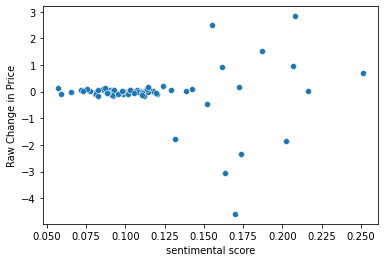

In [161]:
sns.scatterplot(tesla_month_combined["sentimental score"], tesla_month_combined["Raw Change in Price"])

c:\Users\saxen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diff', ylabel='Raw Change in Price'>

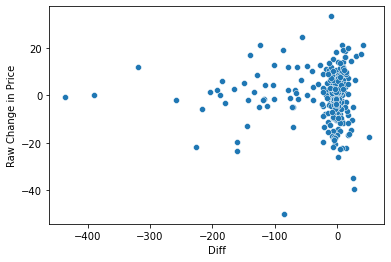

In [155]:
sns.scatterplot(tesla_counts_combined["Diff"], tesla_counts_combined["Raw Change in Price"])

c:\Users\saxen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\saxen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='End Day Price'>

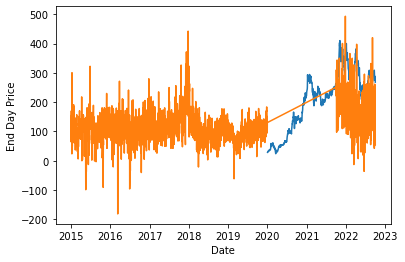

In [121]:
sns.lineplot(tesla["Date"], tesla["End Day Price"])
sns.lineplot(tesla_means["Date"], tesla_means["sentimental score"]*1000)

,Date,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Raw Change in Price,% Change in Price,sentimental score


## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.